In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

In [ ]:
!pip uninstall tensorflow==2.2

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import os, glob
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from PIL import Image

import shutil 

In [6]:
## 150가지 음식
## 카테고리별로 트레인이미지와 테스트이미지로 분류해서 나누어 주는 코드 

categories = ["가지볶음", "간장게장", "갈비구이", "갈비찜", "갈비탕", "갈치구이", 
              "갈치조림", "감자전", "감자조림", "감자채볶음", "감자탕", "갓김치", 
              "건새우볶음", "경단", "계란국", "계란말이", "계란찜", "계란후라이", 
              "고등어구이", "고등어조림", "고사리나물", "고추장진미채볶음", 
              "고추튀김", "곰탕_설렁탕", "곱창구이", "곱창전골", "과메기", "김밥", 
              "김치볶음밥", "김치전", "김치찌개", "김치찜", "깍두기", "깻잎장아찌", 
              "꼬막찜", "꽁치조림", "꽈리고추무침", "꿀떡", "나박김치", "누룽지", 
              "닭갈비", "닭계장", "닭볶음탕", "더덕구이", "도라지무침", "도토리묵", 
              "동그랑땡", "동태찌개", "된장찌개", "두부김치", "두부조림", "땅콩조림",
              "떡갈비", "떡국_만두국", "떡꼬치", "떡볶이", "라면", "라볶이", "막국수",
              "만두", "매운탕", "멍게", "메추리알장조림", "멸치볶음", "무국", 
              "무생채", "물냉면", "물회", "미역국", "미역줄기볶음", "배추김치", 
              "백김치", "보쌈", "부추김치", "북엇국", "불고기", "비빔냉면", "비빔밥",
              "산낙지", "삼겹살", "삼계탕", "새우볶음밥", "새우튀김", "생선전", 
              "소세지볶음", "송편", "수육", "수정과", "수제비", "숙주나물", "순대", 
              "순두부찌개", "시금치나물", "시래기국", "식혜", "알밥", "애호박볶음", 
              "약과", "약식", "양념게장", "양념치킨", "어묵볶음", "연근조림", 
              "열무국수", "열무김치", "오이소박이", "오징어채볶음", "오징어튀김", 
              "우엉조림", "유부초밥", "육개장", "육회", "잔치국수", "잡곡밥", "잡채",
              "장어구이", "장조림", "전복죽", "젓갈", "제육볶음", "조개구이", 
              "조기구이", "족발", "주꾸미볶음", "주먹밥", "짜장면", "짬뽕", "쫄면", 
              "찜닭", "총각김치", "추어탕", "칼국수", "코다리조림", "콩국수", 
              "콩나물국", "콩나물무침", "콩자반", "파김치", "파전", "편육", "피자", 
              "한과", "해물찜", "호박전", "호박죽", "홍어무침", "황태구이", "회무침",
              "후라이드치킨", "훈제오리"]

image_folder = 'food'
labels = {}

for f_name in categories:      
    path = image_folder + '/' + f_name + '/'
    
    path_train = path + 'train/'
    path_test = path + 'test/'

    os.makedirs(path_train)
    os.makedirs(path_test)

    file_list = os.listdir(path)  
    print(f_name, '이미지 수 : ', len(file_list))

    
    for filename in file_list:
        labels[f_name] = file_list[1].split('.')[0][-8:-5]
    
        try:
            fromFilePathName = path + filename
            if filename == 'crop_area.properties':
                os.remove(path + '/crop_area.properties')
            elif filename == 'org_url.csv':
                os.remove(path + '/org_url.csv')
            elif filename in ['test', 'train']:
                continue

            if int(filename.split('.')[0][-4:]) < 800:
                resultFilePathName = path_train + filename
                shutil.move(fromFilePathName, resultFilePathName)
            else:
                resultFilePathName = path_test + filename
                shutil.move(fromFilePathName, resultFilePathName)
                
        except:
            print(fromFilePathName)


가지볶음 이미지 수 :  1004
food/가지볶음/crop_area.properties
food/가지볶음/org_url.csv
간장게장 이미지 수 :  1005
food/간장게장/crop_area.properties
food/간장게장/org_url.csv
갈비구이 이미지 수 :  1004
food/갈비구이/crop_area.properties
food/갈비구이/org_url.csv
갈비찜 이미지 수 :  1004
food/갈비찜/crop_area.properties
food/갈비찜/org_url.csv
갈비탕 이미지 수 :  1004
food/갈비탕/crop_area.properties
food/갈비탕/org_url.csv
갈치구이 이미지 수 :  1004
food/갈치구이/crop_area.properties
food/갈치구이/org_url.csv
갈치조림 이미지 수 :  1009
food/갈치조림/crop_area.properties
food/갈치조림/org_url.csv
감자전 이미지 수 :  1005
food/감자전/crop_area.properties
food/감자전/org_url.csv
감자조림 이미지 수 :  1005
food/감자조림/crop_area.properties
food/감자조림/org_url.csv
감자채볶음 이미지 수 :  1004
food/감자채볶음/crop_area.properties
food/감자채볶음/org_url.csv
감자탕 이미지 수 :  1007
food/감자탕/crop_area.properties
food/감자탕/org_url.csv
갓김치 이미지 수 :  1004
food/갓김치/crop_area.properties
food/갓김치/org_url.csv
건새우볶음 이미지 수 :  1004
food/건새우볶음/crop_area.properties
food/건새우볶음/org_url.csv
경단 이미지 수 :  1004
food/경단/crop_area.properties
food/경단/org_url.csv
계란국 이미지

food/장어구이/org_url.csv
장조림 이미지 수 :  1008
food/장조림/crop_area.properties
food/장조림/org_url.csv
전복죽 이미지 수 :  1004
food/전복죽/crop_area.properties
food/전복죽/org_url.csv
젓갈 이미지 수 :  1004
food/젓갈/crop_area.properties
food/젓갈/org_url.csv
제육볶음 이미지 수 :  1005
food/제육볶음/crop_area.properties
food/제육볶음/org_url.csv
조개구이 이미지 수 :  1004
food/조개구이/crop_area.properties
food/조개구이/org_url.csv
조기구이 이미지 수 :  1004
food/조기구이/crop_area.properties
food/조기구이/org_url.csv
족발 이미지 수 :  1005
food/족발/crop_area.properties
food/족발/org_url.csv
주꾸미볶음 이미지 수 :  1006
food/주꾸미볶음/crop_area.properties
food/주꾸미볶음/org_url.csv
주먹밥 이미지 수 :  1004
food/주먹밥/crop_area.properties
food/주먹밥/org_url.csv
짜장면 이미지 수 :  1004
food/짜장면/crop_area.properties
food/짜장면/org_url.csv
짬뽕 이미지 수 :  1004
food/짬뽕/crop_area.properties
food/짬뽕/org_url.csv
쫄면 이미지 수 :  1004
food/쫄면/crop_area.properties
food/쫄면/org_url.csv
찜닭 이미지 수 :  1007
food/찜닭/crop_area.properties
food/찜닭/org_url.csv
총각김치 이미지 수 :  1004
food/총각김치/crop_area.properties
food/총각김치/org_url.csv
추어탕 이미지 수

In [3]:
file_ex_train = os.listdir(path_train)
file_ex_test = os.listdir(path_test)

In [20]:
file_ex_train

['Img_013_0000.JPG',
 'Img_013_0001.jpg',
 'Img_013_0002.jpg',
 'Img_013_0003.jpg',
 'Img_013_0004.jpg',
 'Img_013_0005.jpg',
 'Img_013_0006.jpg',
 'Img_013_0007.jpg',
 'Img_013_0008.jpg',
 'Img_013_0009.jpg',
 'Img_013_0010.png',
 'Img_013_0011.jpg',
 'Img_013_0012.jpg',
 'Img_013_0013.jpg',
 'Img_013_0014.jpg',
 'Img_013_0015.JPG',
 'Img_013_0016.JPG',
 'Img_013_0017.png',
 'Img_013_0018.png',
 'Img_013_0019.jpg',
 'Img_013_0020.png',
 'Img_013_0021.jpg',
 'Img_013_0022.jpg',
 'Img_013_0023.jpg',
 'Img_013_0024.jpg',
 'Img_013_0025.jpg',
 'Img_013_0026.jpg',
 'Img_013_0027.jpg',
 'Img_013_0028.jpg',
 'Img_013_0029.jpg',
 'Img_013_0030.jpg',
 'Img_013_0031.jpg',
 'Img_013_0032.jpg',
 'Img_013_0033.jpg',
 'Img_013_0034.jpg',
 'Img_013_0035.jpg',
 'Img_013_0036.jpg',
 'Img_013_0037.jpg',
 'Img_013_0038.jpg',
 'Img_013_0039.jpg',
 'Img_013_0040.jpg',
 'Img_013_0041.jpg',
 'Img_013_0042.jpg',
 'Img_013_0043.jpg',
 'Img_013_0044.jpg',
 'Img_013_0045.jpg',
 'Img_013_0046.jpg',
 'Img_013_004

In [19]:
image_folder = 'FinalFood'
img_path = image_folder + '/'
food_list = ['갈비찜','갈비탕']

image_size = 224

x_train = []
x_test = []
y_train = []
y_test = []

for tt in ['train', 'test']:
    print(tt)
    for i, food in enumerate(food_list):
        path = img_path + food + '/' + tt 
        print(food, end = ',')
         
        files = []
        files.extend(glob.glob(path + '/*'))

        for file in files:
            img = Image.open(file)
            img = img.convert("RGB") # 색상 모드 변경
            img = img.resize((image_size, image_size)) # 이미지 크기 변경
            
            data = np.asarray(img)
            
            globals()['x_{}'.format(tt)].append(data)
            globals()['y_{}'.format(tt)].append(i)
    print()

train
갈비찜,갈비탕,
test
갈비찜,갈비탕,


In [15]:
x_train

[array([[[197, 217, 190],
         [207, 227, 199],
         [208, 235, 220],
         ...,
         [251, 251, 253],
         [240, 250, 249],
         [255, 250, 254]],
 
        [[199, 215, 186],
         [203, 222, 194],
         [205, 237, 222],
         ...,
         [244, 250, 250],
         [239, 249, 251],
         [240, 251, 253]],
 
        [[201, 219, 193],
         [206, 229, 209],
         [210, 235, 216],
         ...,
         [246, 250, 253],
         [252, 252, 252],
         [241, 249, 251]],
 
        ...,
 
        [[141, 177, 175],
         [142, 192, 199],
         [143, 191, 191],
         ...,
         [ 85, 111, 144],
         [111, 141, 167],
         [174, 229, 250]],
 
        [[145, 191, 191],
         [142, 201, 209],
         [141, 181, 180],
         ...,
         [ 80, 116, 142],
         [100, 132, 157],
         [168, 220, 241]],
 
        [[151, 200, 197],
         [148, 203, 208],
         [141, 180, 179],
         ...,
         [ 86, 116, 144],
  

In [21]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 224, 224, 3), (400, 224, 224, 3), (1600,), (400,))

In [ ]:
!pip uninstall tensorflow==1.13.1

In [20]:
###########################################################################
## 알렉스넷 시작 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np




# 여기에서 이제 사진 들어오는 곳인데 우리꺼 np를 받아서 카테고리 별로 돌리면 될듯 
np.random.seed(1000)

#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
# valid = 입력값보다 출력값을 작게 만들어 주는거 
model.add(Conv2D(filters=96, input_shape=(64,64,3), kernel_size=(3,3), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

# [?,6,6,96], [11,11,96,256].
# ValueError: Negative dimension size caused by subtracting 11 from 6 for 'conv2d_11/Conv2D' (op: 'Conv2D') with input shapes: [?,6,6,96], [11,11,96,256].


# 2nd Convolutional Layer
# strides = 움직이는 정도 (matrix가 움직이는 정도)
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='valid'))

model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096)) # , input_shape=(224*224*3,)
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy']) # adam, RMSProp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 62, 62, 96)        2688      
_________________________________________________________________
activation_45 (Activation)   (None, 62, 62, 96)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 29, 29, 256)       221440    
_________________________________________________________________
activation_46 (Activation)   (None, 29, 29, 256)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 384)       885120    
__________

In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.3)
result = model.evaluate(x_test, y_test)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

ValueError: Error when checking input: expected conv2d_input to have shape (64, 64, 3) but got array with shape (224, 224, 3)

In [ ]:
food_list = ["갈비구이", "갈비찜", "갈비탕", "감자탕", "곰탕_설렁탕", 
             "김밥", "닭갈비", "떡갈비", "막국수", "매운탕", "물냉면", 
             "보쌈", "불고기", "비빔냉면", "비빔밥", "산낙지", "삼겹살", 
             "삼계탕", "양념치킨", "장어구이", "제육볶음", "족발", 
             "주꾸미볶음", "짜장면", "짬뽕", "추어탕", "칼국수", 
             "피자", "후라이드치킨", "훈제오리"]

Train on 1120 samples, validate on 480 samples
Epoch 1/2
1120/1120 [==============================] - 75s 67ms/sample - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/2
407/407 [==============================] - 5s 14ms/sample - loss: 8.0789 - acc: 0.4988
loss (cross-entropy) : 8.078850650083542
test accuracy : 0.4987715


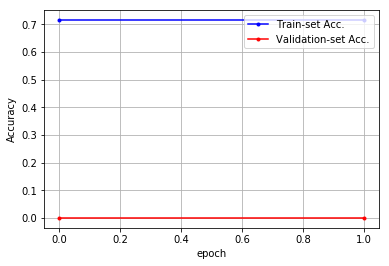

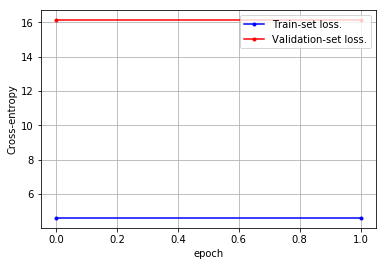

In [18]:
history = model.fit(x_train, y_train, epochs=2, validation_split=0.3)
result = model.evaluate(x_test, y_test)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

# acc = history.history['sparse_categorical_accuracy']
# val_acc = history.history['val_sparse_categorical_accuracy']

acc = history.history['acc']
val_acc = history.history['val_acc']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

Train on 1120 samples, validate on 480 samples
Epoch 1/2
1120/1120 [==============================] - 51s 46ms/sample - loss: 4.8151 - acc: 0.6955 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/2
407/407 [==============================] - 3s 8ms/sample - loss: 8.0789 - acc: 0.4988
loss (cross-entropy) : 8.078850650083542
test accuracy : 0.4987715


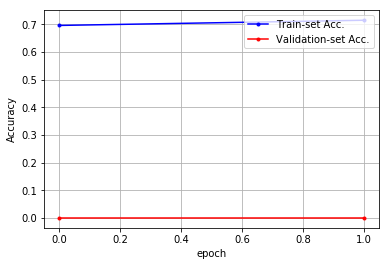

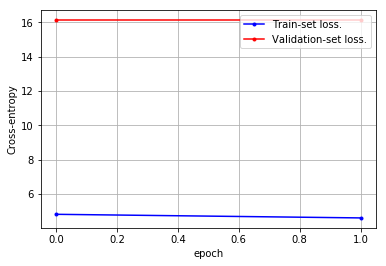

In [21]:
# op 바꿈, 필터도 바꿈

history = model.fit(x_train, y_train, epochs=2, validation_split=0.3)
result = model.evaluate(x_test, y_test)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

# acc = history.history['sparse_categorical_accuracy']
# val_acc = history.history['val_sparse_categorical_accuracy']

acc = history.history['acc']
val_acc = history.history['val_acc']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

In [15]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
loss (cross-entropy) : 8.078850650083542
test accuracy : 0.4987715

In [16]:
history.history['acc']

[0.6973214,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573,
 0.71428573]

In [ ]:
## 이미지 확장자가 다른것을 모아서 넣어주는 코드 
image_size = 50

X = []
y = []

for i, food in enumerate(categories):
    img_dir = root_dir + '/' + food
    files = []
    
    for extension in ['jpeg', 'jpg', 'png', 'gif', 'bmp']:
        files.extend(glob.glob(img_dir + '/*.' + extension))
    
    for file in files:
        img = Image.open(file)
        img = img.convert("RGB") # 색상 모드 변경
        img = img.resize((image_size, image_size)) # 이미지 크기 변경
        
        data = np.asarray(img)
        X.append(data)
        y.append(i)